In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm
import matplotlib
import h5py

import calculation.MeanFieldv2 as MFv2
import calculation.CurrentMeirv2 as CMv2
import calculation.SusceptibilitySimpv2 as Susceptv2

In [2]:
omegaSpace = np.linspace(-10, 10, 51)

lambdaValue = 1.0
phiValue = 0.6
voltageValue = 0.5
couplingValue = 0.7
Tvalue = 1e-7

In [3]:
pbar = tqdm(total=omegaSpace.size)


PiKtheo = Susceptv2.computePiK(omegaSpace, lambdaValue, phiValue, voltageValue, couplingValue, Tvalue=Tvalue)
PiKnum = Susceptv2.computePiKnum(omegaSpace, lambdaValue, phiValue, voltageValue, couplingValue, Tvalue=Tvalue, pbar=pbar)

  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:10<00:00,  6.09it/s]

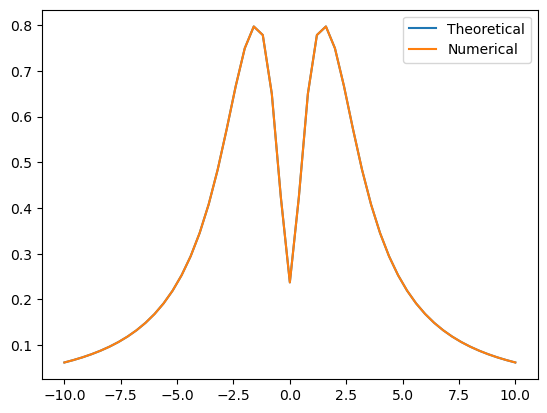

In [4]:
plt.plot(omegaSpace, PiKtheo.imag, label="Theoretical")
plt.plot(omegaSpace, PiKnum.imag, label="Numerical")
plt.legend()

(-3.0, 3.0)

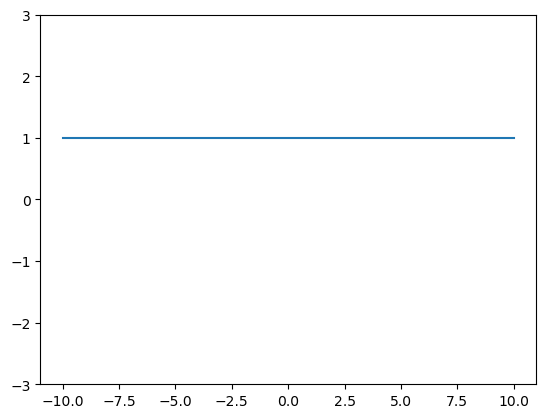

In [5]:
plt.plot(omegaSpace, PiKtheo.imag/PiKnum.imag, label="Ratio")
plt.ylim(-3, 3)

In [6]:
def greenKeldysh(epsilon, omega, lambdaValue, phiValue, voltageValue, couplingValue, Tvalue=1e-5):
    beta = 1.0/Tvalue
    num = -1j*couplingValue*(np.tanh(0.5*beta*(omega - voltageValue/2.0)) + np.tanh(0.5*beta*(omega + voltageValue/2.0)))
    den = (omega - epsilon + 2.0*lambdaValue*phiValue)**2 + couplingValue**2
    return num*np.reciprocal(den)

In [8]:

epsilon = 0.0
omega = 1.0
phiValue = 0.6
voltageValue = 0.5
couplingValue = 0.7

vec = greenKeldysh(epsilon, omega, lambdaValue, phiValue, voltageValue, couplingValue)

print(vec)

-0.2626641651031894j


In [10]:
omega = 1.0
couplingValue = 0.1
voltageValue = 0.5
Tvalue = 1e-5

beta2 = 0.5 / Tvalue
print(np.tanh(beta2 * (omega - voltageValue / 2.0)))  # Check if this works


1.0
